In [1]:
! pip install pandas openpyxl
! pip install pandas
! pip install matplotlib
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import requests
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [3]:
# LOAD DATA
df = pd.read_excel(r"C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT3\FAOSTAT_data.xlsx")
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.00,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.30,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.00,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.00,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.90,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224642,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,2019,t,5010.21,I,Imputed value,NaN
224643,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,2020,t,4795.70,I,Imputed value,NaN
224644,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,2021,t,4921.05,I,Imputed value,NaN
224645,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,2022,t,4966.37,I,Imputed value,NaN


In [4]:
# BASICS INFO
df.shape
df.size
df.info
df.describe

<bound method NDFrame.describe of        Domain Code                        Domain  Area Code (M49)  \
0              QCL  Crops and livestock products                4   
1              QCL  Crops and livestock products                4   
2              QCL  Crops and livestock products                4   
3              QCL  Crops and livestock products                4   
4              QCL  Crops and livestock products                4   
...            ...                           ...              ...   
224642         QCL  Crops and livestock products              716   
224643         QCL  Crops and livestock products              716   
224644         QCL  Crops and livestock products              716   
224645         QCL  Crops and livestock products              716   
224646         QCL  Crops and livestock products              716   

               Area  Element Code         Element Item Code (CPC)  \
0       Afghanistan          5312  Area harvested            1371   

In [5]:
df.columns.tolist()

['Domain Code',
 'Domain',
 'Area Code (M49)',
 'Area',
 'Element Code',
 'Element',
 'Item Code (CPC)',
 'Item',
 'Year Code',
 'Year',
 'Unit',
 'Value',
 'Flag',
 'Flag Description',
 'Note']

In [6]:
df.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                 6517
Flag                     4
Flag Description        13
Note                219549
dtype: int64

In [ ]:
df.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)      object
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                 object
dtype: object

In [ ]:
#Step1: column name:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns.tolist()


['domain_code',
 'domain',
 'area_code_(m49)',
 'area',
 'element_code',
 'element',
 'item_code_(cpc)',
 'item',
 'year_code',
 'year',
 'unit',
 'value',
 'flag',
 'flag_description',
 'note']

In [ ]:
#step2:convert the datatype
df['domain_code'] = df['domain_code'].astype(str)
df['item_code_(cpc)'] = df['item_code_(cpc)'].astype(str)
df['area_code_(m49)'] = df['area_code_(m49)'].astype('int64')
df['year_code'] = df['year_code'].astype('int64')
df['year'] = df['year'].astype('int64')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [10]:
#Step 3: Drop the note Column 
df = df.drop(columns=['note'])


In [11]:
#step 4: Remove the null values
df['item_code_(cpc)'].fillna(method='ffill', inplace=True)
df['unit'].fillna("Unknown", inplace=True)
df['value'].fillna(df['value'].median(), inplace=True)
df['flag'].fillna("n/a", inplace=True)
df['flag_description'].fillna("not available", inplace=True)

C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\2267994265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_code_(cpc)'].fillna(method='ffill', inplace=True)
C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\2267994265.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['item_code_(cpc)'].fillna(method='ffill', inplace=True)
C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\2267994265.py:3: FutureWarning: A value 

In [12]:
#Finalize
df.dropna(inplace=True)

In [13]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [14]:
df.isnull().sum()

domain_code         0
domain              0
area_code_(m49)     0
area                0
element_code        0
element             0
item_code_(cpc)     0
item                0
year_code           0
year                0
unit                0
value               0
flag                0
flag_description    0
dtype: int64

In [15]:
df.dtypes

domain_code          object
domain               object
area_code_(m49)       int64
area                 object
element_code          int64
element              object
item_code_(cpc)      object
item                 object
year_code             int64
year                  int64
unit                 object
value               float64
flag                 object
flag_description     object
dtype: object

In [16]:
#1.Analyze Crop Distribution

Most cultivated crops:
 item
Hen eggs in shell, fresh                          4546
Meat of chickens, fresh or chilled                2906
Meat of cattle with the bone, fresh or chilled    2900
Other vegetables, fresh n.e.c.                    2821
Raw milk of cattle                                2805
Meat of sheep, fresh or chilled                   2695
Meat of pig with the bone, fresh or chilled       2640
Meat of goat, fresh or chilled                    2636
Raw hides and skins of cattle                     2624
Maize (corn)                                      2538
Name: count, dtype: int64


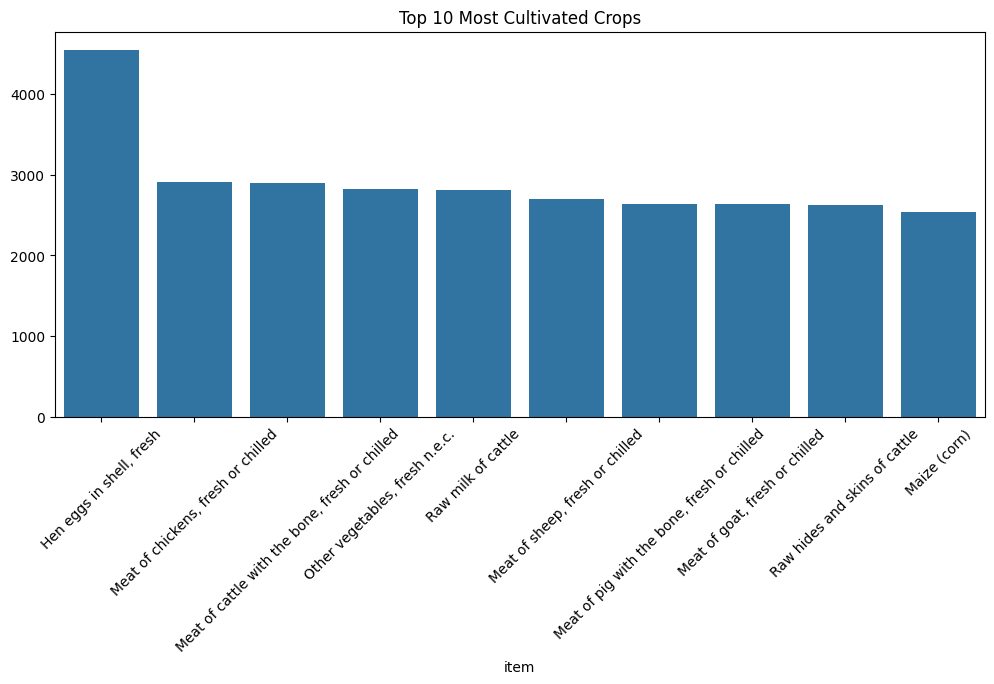

In [17]:
#(i):Crop Types:  Study the distribution of the Item column to identify the most and least cultivated crops across regions

crop_counts = df['item'].value_counts()
print("Most cultivated crops:\n", crop_counts.head(10))

plt.figure(figsize=(12,5))
sns.barplot(x=crop_counts.head(10).index, y=crop_counts.head(10).values)
plt.title("Top 10 Most Cultivated Crops")
plt.xticks(rotation=45)
plt.show()

Top producing regions:
 area
China                       3.710784e+10
China, mainland             3.683356e+10
India                       1.668908e+10
Brazil                      1.051957e+10
United States of America    9.459650e+09
Pakistan                    4.245128e+09
Indonesia                   4.111802e+09
Russian Federation          3.681117e+09
Nigeria                     3.487654e+09
Mexico                      2.368686e+09
Name: value, dtype: float64


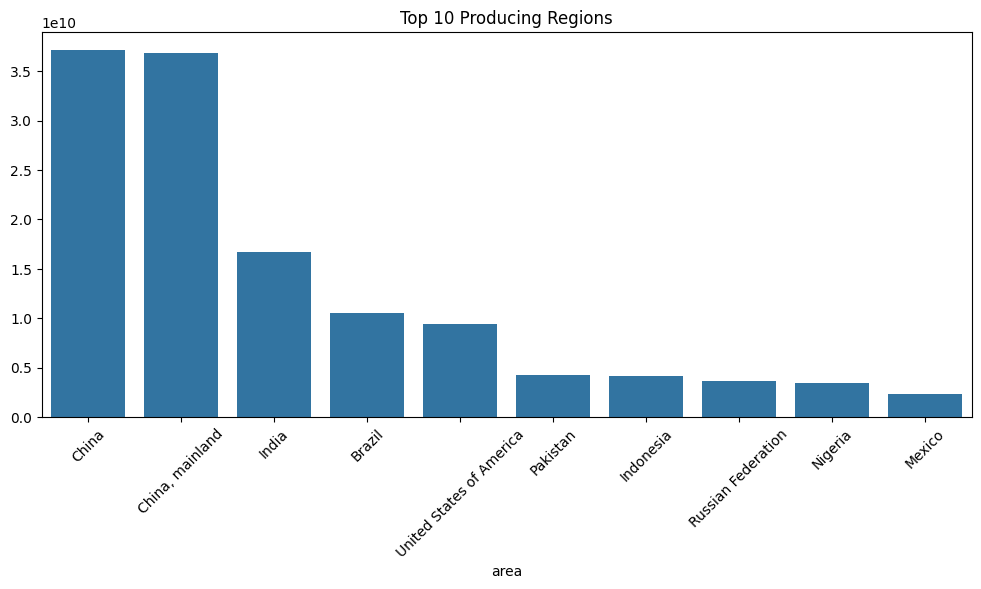

In [18]:
#(ii): Geographical distribution:  Explore the Area column to understand which regions focus on specific crops or have high agricultural activity.

area_production = df.groupby('area')['value'].sum().sort_values(ascending=False)
print("Top producing regions:\n", area_production.head(10))

plt.figure(figsize=(12,5))
sns.barplot(x=area_production.head(10).index, y=area_production.head(10).values)
plt.title("Top 10 Producing Regions")
plt.xticks(rotation=45)
plt.show()

In [19]:
#2. Temporal Analysis : 

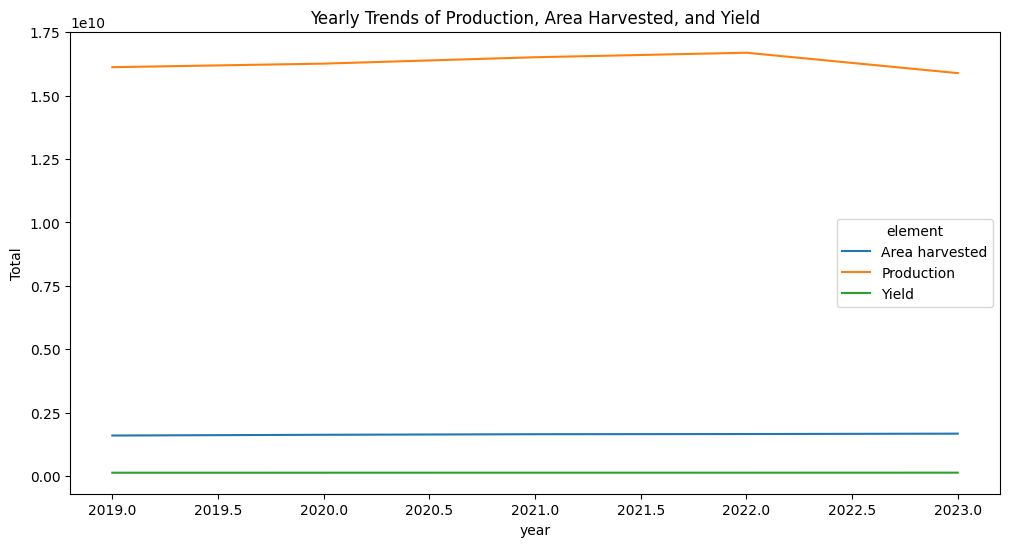

In [78]:
# (i): early Trends : Analyze the Year column to detect trends in Area harvested, Yield, and Production over time.

elements = ["Production", "Area harvested", "Yield"]
df_elements = df[df['element'].isin(elements)]

yearly_trends = df_elements.pivot_table(index='year', columns='element', values='value', aggfunc='sum')

yearly_trends.plot(figsize=(12,6))
plt.title("Yearly Trends of Production, Area Harvested, and Yield")
plt.ylabel("Total")
plt.show()


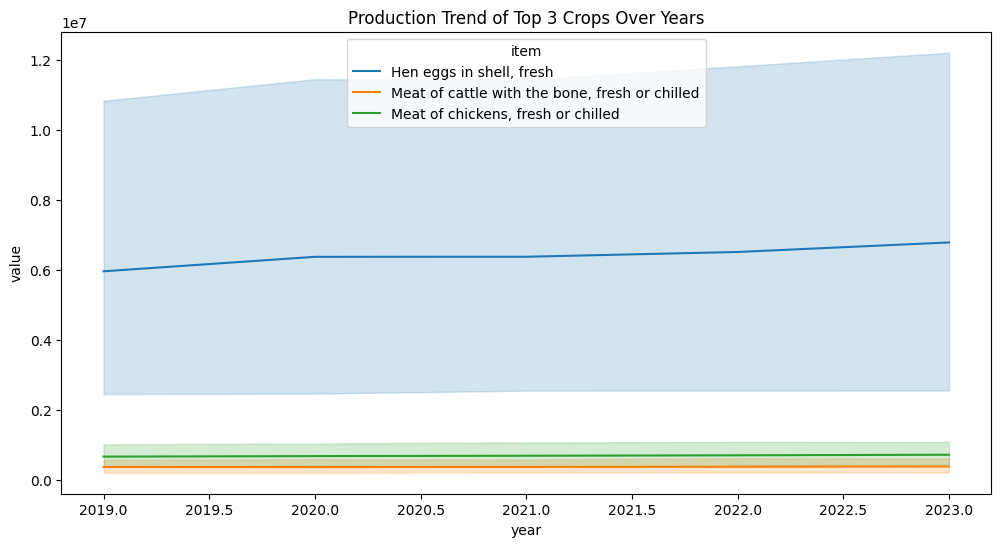

In [20]:
# (i) Growth Analysis : Investigate if certain crops or regions show increasing or decreasing trends in yield or production. 

top_crops = df[df['element'] == 'Production']['item'].value_counts().head(3).index
df_top_crops = df[(df['item'].isin(top_crops)) & (df['element'] == 'Production')]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top_crops, x='year', y='value', hue='item')
plt.title("Production Trend of Top 3 Crops Over Years")
plt.show()


In [21]:
#3.Environmental Relationships

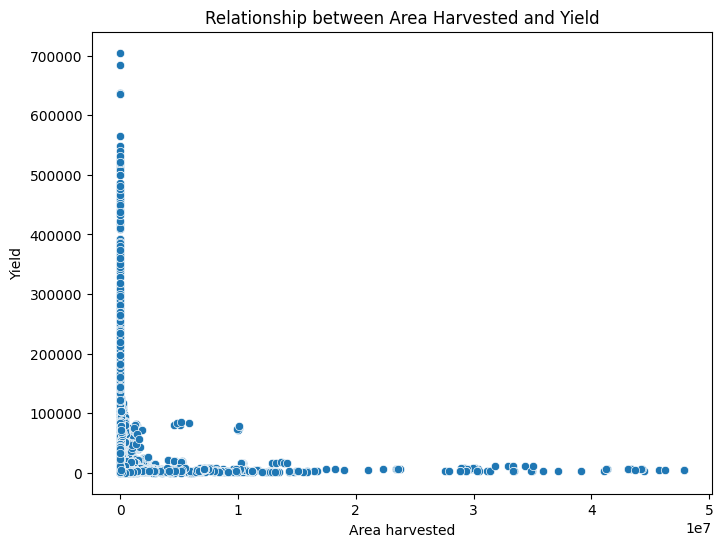

In [22]:
# Although explicit environmental data is absent, infer relationships between the Area harvested and Yield to check if there’s an impact of resource utilization on crop productivity

df_area_yield = df[df['element'].isin(['Area harvested', 'Yield'])]
pivot_area_yield = df_area_yield.pivot_table(index=['area','year','item'], columns='element', values='value').reset_index()

# Scatter plot to check relationship
plt.figure(figsize=(8,6))
sns.scatterplot(data=pivot_area_yield, x='Area harvested', y='Yield')
plt.title("Relationship between Area Harvested and Yield")
plt.show()


In [23]:
#4. Input-Output Relationships:

Correlation matrix:
 element         Area harvested  Production     Yield
element                                             
Area harvested        1.000000    0.640862 -0.026551
Production            0.640862    1.000000  0.052955
Yield                -0.026551    0.052955  1.000000


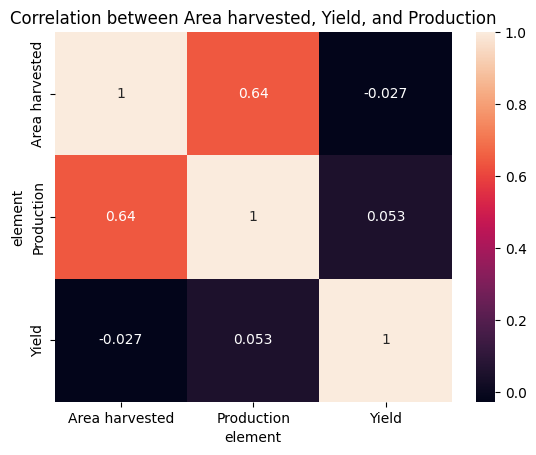

In [24]:
# Study correlations between Area harvested, Yield, and Production to understand the relationship between land usage and productivity.

df_3elements = df[df['element'].isin(['Area harvested', 'Yield', 'Production'])]
pivot_all = df_3elements.pivot_table(index=['area','year','item'], columns='element', values='value').dropna()

print("Correlation matrix:\n", pivot_all.corr())

sns.heatmap(pivot_all.corr(), annot=True)
plt.title("Correlation between Area harvested, Yield, and Production")
plt.show()




In [25]:
#5. Comparative Analysis

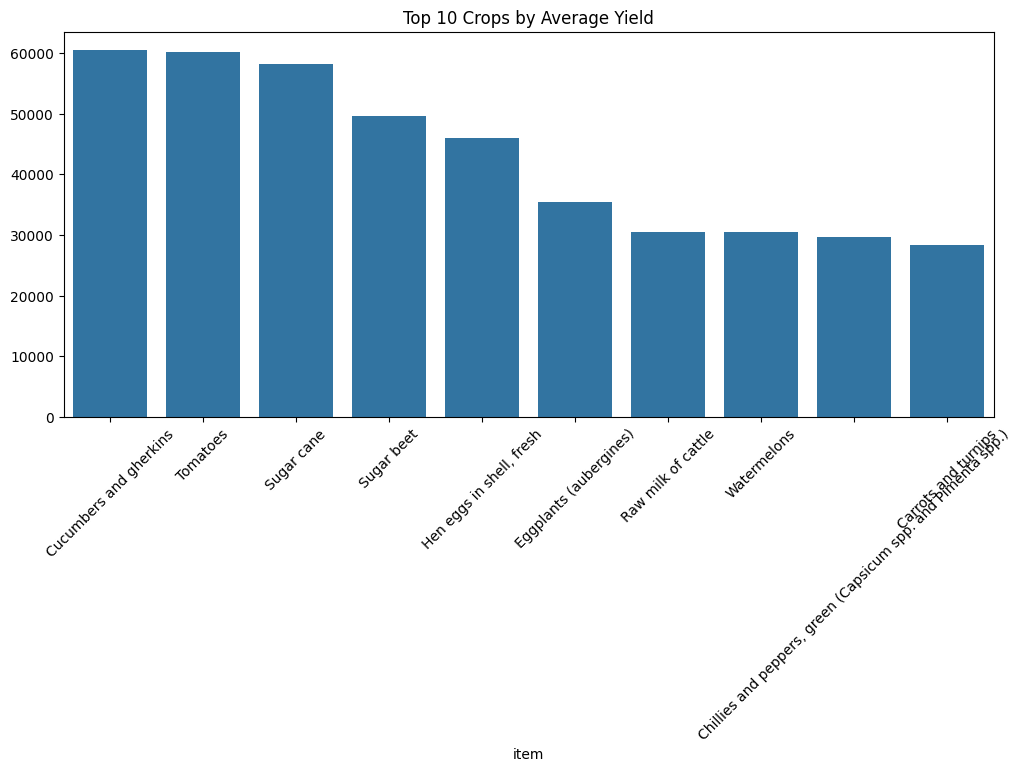

In [26]:
# (i): Across Crops: Compare yields (Yield) of different crops (Item) to identify high-yield vs. low-yield crops.

df_yield = df[df['element'] == 'Yield']
avg_yield_crop = df_yield.groupby('item')['value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=avg_yield_crop.head(10).index, y=avg_yield_crop.head(10).values)
plt.title("Top 10 Crops by Average Yield")
plt.xticks(rotation=45)
plt.show()

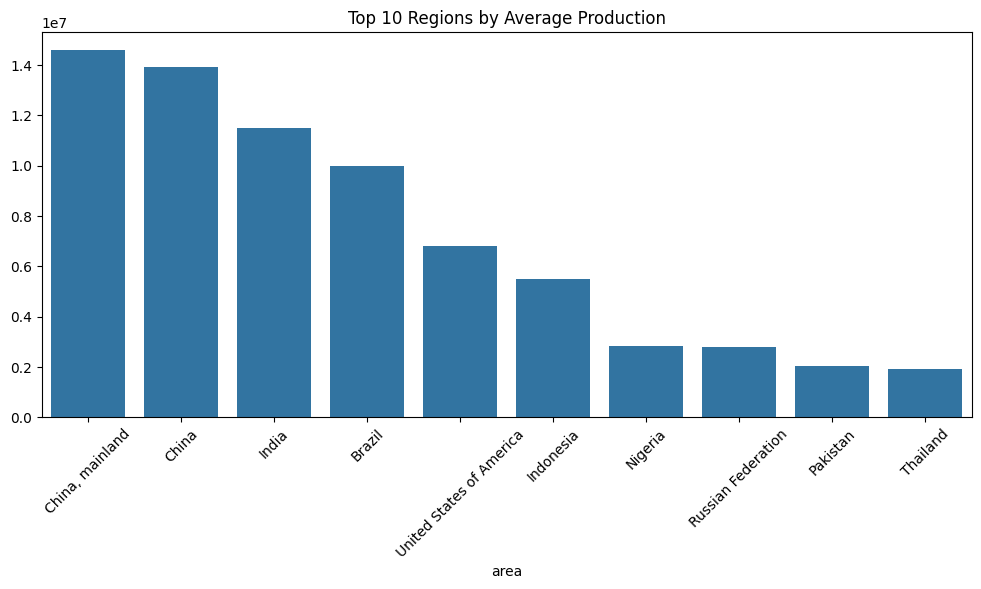

In [27]:
#(ii): Across Regions: Compare production (Production) across different areas (Area) to find highly productive regions.

df_production = df[df['element'] == 'Production']
avg_production_area = df_production.groupby('area')['value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=avg_production_area.head(10).index, y=avg_production_area.head(10).values)
plt.title("Top 10 Regions by Average Production")
plt.xticks(rotation=45)
plt.show()


In [28]:
df.columns

Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description'],
      dtype='object')

In [29]:
#(iii). Productivity Analysis:Examine variations in Yield to identify efficient crops and regions.,Calculate productivity ratios: Production/Area harvested to cross-verify yields.

pivot_df = df.pivot_table(
    index=['area', 'item', 'year'],
    columns='element',
    values='value',
    aggfunc='mean'
).reset_index()
# Calculate productivity ratio: tons per hectare
pivot_df['productivity_ratio'] = pivot_df['Production'] / pivot_df['Area harvested']
# Group by crop and compute average yield
crop_efficiency = pivot_df.groupby('item')['Yield'].mean().sort_values(ascending=False)

# Top 10 most efficient crops by yield
print("Top 10 crops by average yield:")
print(crop_efficiency.head(10))
# Group by region and compute average yield
region_efficiency = pivot_df.groupby('area')['Yield'].mean().sort_values(ascending=False)

# Top 10 most efficient regions by yield
print("Top 10 regions by average yield:")
print(region_efficiency.head(10))


Top 10 crops by average yield:
item
Cucumbers and gherkins                                          60452.688024
Tomatoes                                                        60133.858072
Sugar cane                                                      58181.027426
Sugar beet                                                      49593.234276
Hen eggs in shell, fresh                                        45664.779652
Eggplants (aubergines)                                          35430.481895
Raw milk of cattle                                              30581.449198
Watermelons                                                     30504.904276
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    29597.070249
Carrots and turnips                                             28433.555828
Name: Yield, dtype: float64
Top 10 regions by average yield:
area
Iceland                                                 103546.890909
Netherlands (Kingdom of the)                             6

C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\3843368373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


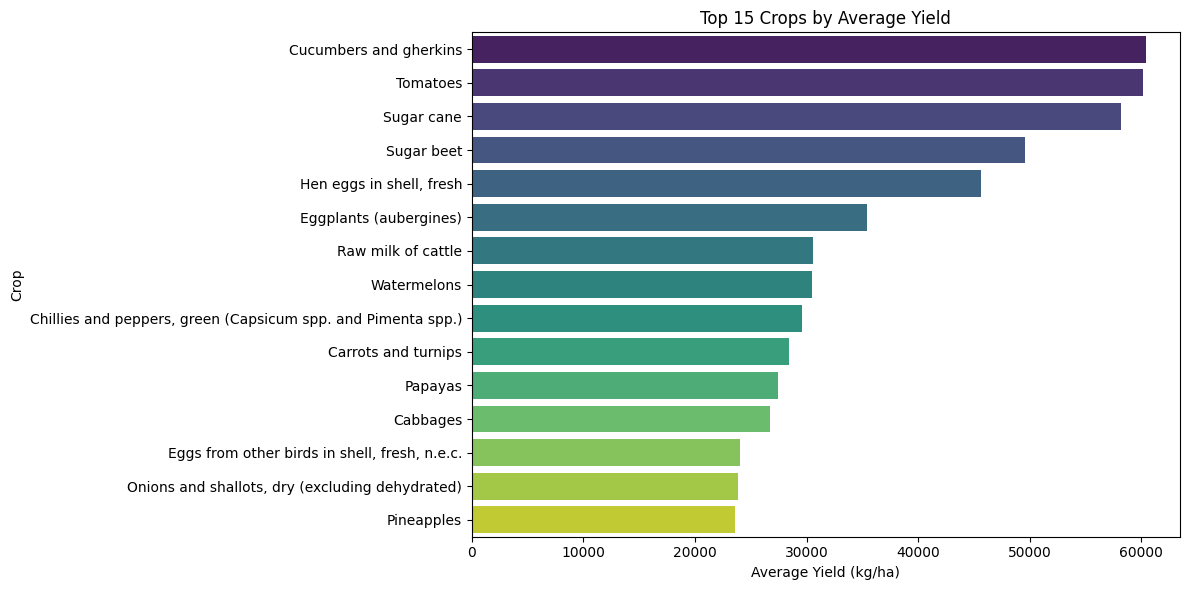

In [30]:
# Plot yield variation for top 15 crops
top_crops = crop_efficiency.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.title("Top 15 Crops by Average Yield")
plt.xlabel("Average Yield (kg/ha)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

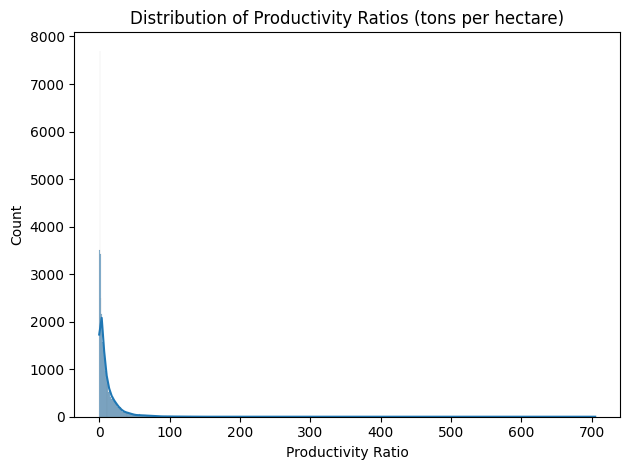

In [31]:
# Plot distribution of productivity ratios
sns.histplot(pivot_df['productivity_ratio'].dropna(), kde=True)
plt.title("Distribution of Productivity Ratios (tons per hectare)")
plt.xlabel("Productivity Ratio")
plt.tight_layout()
plt.show()

In [32]:
#6.Outliers and Anomalies,Identify anomalies in Yield or Production, such as unusually high or low values, and correlate them with potential external factors like policies or environmental changes.

# Yield summary
yield_values = df[df['element'] == 'Yield']['value']
production_values = df[df['element'] == 'Production']['value']

print("Yield Summary:")
print(yield_values.describe())

print("\nProduction Summary:")
print(production_values.describe())




Yield Summary:
count     51566.000000
mean      13298.889402
std       28461.072879
min           0.000000
25%        1359.275000
50%        5216.100000
75%       14602.750000
max      705196.700000
Name: value, dtype: float64

Production Summary:
count    8.638200e+04
mean     9.428642e+05
std      1.175122e+07
min      0.000000e+00
25%      9.470000e+02
50%      9.000495e+03
75%      8.958874e+04
max      7.825858e+08
Name: value, dtype: float64


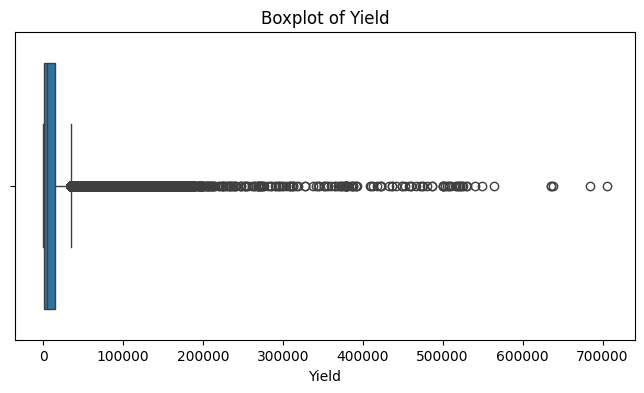

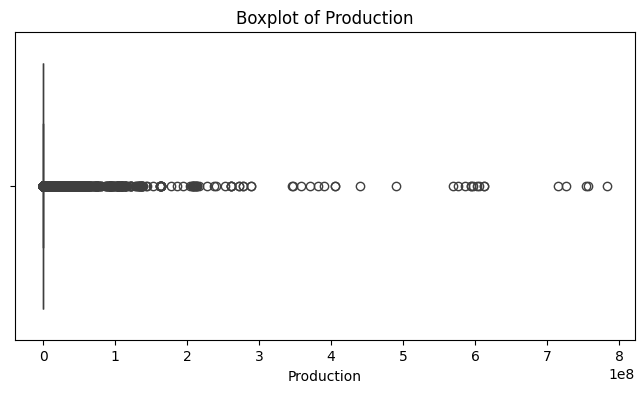

In [33]:
# Boxplot for Yield
plt.figure(figsize=(8, 4))
sns.boxplot(x=yield_values)
plt.title("Boxplot of Yield")
plt.xlabel("Yield")
plt.show()

# Boxplot for Production
plt.figure(figsize=(8, 4))
sns.boxplot(x=production_values)
plt.title("Boxplot of Production")
plt.xlabel("Production")
plt.show()

In [34]:
# 3. Task: Predicting Production (Production, measured in tons):Use Case: Focuses on total output. It answers, "What will the total production of a specific crop be for a given region and year?"

df_filtered = df[df['element'].isin(['Area harvested', 'Yield', 'Production'])]
df_pivot = df_filtered.pivot_table(index=['area', 'item', 'year'],
                                    columns='element',
                                    values='value').reset_index()
df_model = df_pivot.dropna()
df_model.columns = ['area', 'item', 'year', 'area_harvested', 'production', 'yield']
from sklearn.preprocessing import LabelEncoder
le_area = LabelEncoder()
le_item = LabelEncoder()
df_model['area'] = le_area.fit_transform(df_model['area'])
df_model['item'] = le_item.fit_transform(df_model['item'])


C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\1901271468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['area'] = le_area.fit_transform(df_model['area'])
C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_34080\1901271468.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['item'] = le_item.fit_transform(df_model['item'])


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_model[['area', 'item', 'year', 'area_harvested', 'yield']]
y = df_model['production']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

print("R² Score:", r2_score(y_test, y_pred))


RMSE: 3735155.7169319377
R² Score: 0.8832085502447982


In [36]:
# File save to path:
df.to_csv(r"C:\Users\Ranjitha\OneDrive\Documents\Crop_Project.csv", index=False)

In [37]:
df

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.30,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.90,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224642,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,2019,t,5010.21,I,Imputed value
224643,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,2020,t,4795.70,I,Imputed value
224644,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,2021,t,4921.05,I,Imputed value
224645,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,2022,t,4966.37,I,Imputed value


In [38]:
df.columns.tolist()

['domain_code',
 'domain',
 'area_code_(m49)',
 'area',
 'element_code',
 'element',
 'item_code_(cpc)',
 'item',
 'year_code',
 'year',
 'unit',
 'value',
 'flag',
 'flag_description']

In [39]:
df.isnull().sum()

domain_code         0
domain              0
area_code_(m49)     0
area                0
element_code        0
element             0
item_code_(cpc)     0
item                0
year_code           0
year                0
unit                0
value               0
flag                0
flag_description    0
dtype: int64